In [1]:
import requests
import numpy as np
import matplotlib.pylab as plt

>Données d'observations issues des messages internationaux d’observation en surface (SYNOP) circulant sur le système mondial de télécommunication (SMT) de l’Organisation Météorologique Mondiale (OMM). Paramètres atmosphériques mesurés (température, humidité, direction et force du vent, pression atmosphérique, hauteur de précipitations) ou observés (temps sensible, description des nuages, visibilité) depuis la surface terrestre. Selon instrumentation et spécificités locales, d'autres paramètres peuvent être disponibles (hauteur de neige, état du sol, etc.) https://public.opendatasoft.com/explore/dataset/donnees-synop-essentielles-omm/table/?sort=date

In [16]:
# Get dataset info
url = 'https://public.opendatasoft.com/api/datasets/1.0/donnees-synop-essentielles-omm/'
r = requests.get(url)
print(f"{r.status_code=}")
metadata = r.json()

r.status_code=200


In [37]:
for info in metadata['fields']:
    print(f"{info['name']:>15}", info['label'])

      numer_sta ID OMM station 
           date Date 
           pmer Pression au niveau mer 
           tend Variation de pression en 3 heures 
       cod_tend Type de tendance barométrique 
             dd Direction du vent moyen 10 mn 
             ff Vitesse du vent moyen 10 mn 
              t Température 
             td Point de rosée 
              u Humidité 
             vv Visibilité horizontale 
             ww Temps présent 
             w1 Temps passé 1 
             w2 Temps passé 2 
              n Nebulosité totale 
           nbas Nébulosité  des nuages de l' étage inférieur 
           hbas Hauteur de la base des nuages de l'étage inférieur 
             cl Type des nuages de l'étage inférieur 
             cm Type des nuages de l'étage moyen 
             ch Type des nuages de l'étage supérieur 
           pres Pression station 
        niv_bar Niveau barométrique 
           geop Géopotentiel 
         tend24 Variation de pression en 24 heures 
           tn12 Temp

In [68]:
url = "https://public.opendatasoft.com/api/records/1.0/search/"

params = {'dataset':'donnees-synop-essentielles-omm',
          'rows':40,
          'facet':['date', 'nom', 'temps_present', 'libgeo', 'nom_epci', 'nom_dept', 'nom_reg'],
          'refine.nom':'MARIGNANE',
          'sort':'date'}

r = requests.get(url, params=params)
print(r.status_code)
data = r.json()

200


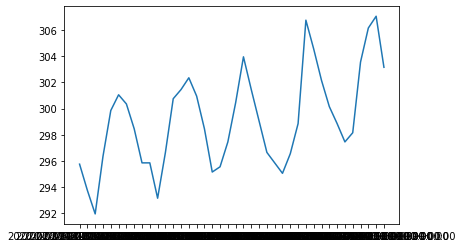

In [69]:
records = [r['fields'] for r in data['records']]
temperature = [(r['date'], r['t']) for r in records]
temperature = sorted(temperature, key=lambda x:x[0])
plt.plot(*zip(*temperature))

In [70]:
temps = {r['temps_present'] for r in records  if 'temps_present' in r}
print('\n'.join(temps))

On n’a pas observé d’évolution des nuages ou on n’a pas pu suivre cette évolution
Brume
